# Análise dos microdados do Enem 2021

In [1]:
# Importando bibliotecas

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
from matplotlib import pyplot as plt

## 1. Leitura do arquivo "MICRODADOS_ENEM_2021.csv" para um dataframe
Vamos carregar o arquivo dos microdados e fazer uma exploração inicial do dataframe

In [6]:
# A biblioteca Pandas, por padrão, lê o encoding como utf-8, no entanto, quando não reconhece algum caracter ele retorna um erro.
# Pesquisando, podemos achar alguns encodings que podem nos servir, no caso, ISO-8859-1. Outro encoding que poderia ser usado: latin1

In [7]:
microdados_enem = pd.read_csv('C:/Users/ernan/Documents/Git/DADOS/MICRODADOS_ENEM_2021.csv', encoding= 'ISO-8859-1', sep = ';')

In [8]:
microdados_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [9]:
microdados_enem.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3389827,210053249138,2021,7,F,1,3,1,1,0,1,...,A,A,A,B,A,A,B,A,A,B
3389828,210053776013,2021,7,F,1,1,1,1,5,1,...,B,A,B,C,A,A,E,B,B,B
3389829,210052441508,2021,13,F,1,3,1,1,15,1,...,B,A,A,A,A,A,B,A,B,B
3389830,210051139675,2021,7,F,1,1,1,1,4,1,...,B,A,B,B,A,B,E,A,C,B
3389831,210052410399,2021,12,F,2,3,1,1,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(microdados_enem.NU_INSCRICAO)

3389832

In [11]:
microdados_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [12]:
microdados_enem.dtypes

NU_INSCRICAO        int64
NU_ANO              int64
TP_FAIXA_ETARIA     int64
TP_SEXO            object
TP_ESTADO_CIVIL     int64
                    ...  
Q021               object
Q022               object
Q023               object
Q024               object
Q025               object
Length: 76, dtype: object

In [13]:
microdados_enem.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,3.389832e+06,3389832.0,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,1.096828e+06,...,2.245844e+06,3.389832e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,3.389830e+06
mean,2.100527e+11,2021.0,5.306013e+00,1.052073e+00,2.043491e+00,1.027106e+00,1.608430e+00,2.581980e+00,1.396214e+00,1.006295e+00,...,5.350802e+02,4.704640e-01,1.140684e+00,1.192657e+02,1.380269e+02,1.153117e+02,1.281853e+02,1.127109e+02,6.135005e+02,3.739557e+00
std,9.962403e+05,0.0,3.902871e+00,4.129414e-01,1.022561e+00,2.049293e-01,7.198306e-01,4.278731e+00,5.938455e-01,7.909361e-02,...,1.106267e+02,4.991269e-01,7.910804e-01,3.391962e+01,4.563224e+01,3.634138e+01,3.883252e+01,6.005667e+01,1.907142e+02,1.378942e+00
min,2.100510e+11,2021.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.100519e+11,2021.0,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,4.447000e+02,0.000000e+00,1.000000e+00,1.000000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.200000e+02,3.000000e+00
50%,2.100527e+11,2021.0,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,5.154000e+02,0.000000e+00,1.000000e+00,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.000000e+02,4.000000e+00
75%,2.100536e+11,2021.0,7.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,...,6.139000e+02,1.000000e+00,1.000000e+00,1.400000e+02,1.800000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.400000e+02,4.000000e+00
max,2.100545e+11,2021.0,2.000000e+01,4.000000e+00,6.000000e+00,4.000000e+00,4.000000e+00,1.500000e+01,3.000000e+00,2.000000e+00,...,9.531000e+02,1.000000e+00,9.000000e+00,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03,2.000000e+01


## 2. Verificação de correlações entre notas
Observando o dicionário de dados, selecionaremos algumas colunas que poderiam revelar possíveis correlações
entre as notas dos candidatos. Além disso, criaremos uma nova coluna com a média das notas das áreas e da redação, excluindo
os valores Nan, que provavelmente representam aqueles candidatos que faltaram a uma ou mais provas

In [14]:
colunas_selecionadas = ['NU_INSCRICAO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [15]:
microdados_selecionados = microdados_enem.filter(items=colunas_selecionadas)

In [16]:
microdados_selecionados.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,210053865474,NaN,574.6,472.6,NaN,760.0
1,210052384164,505.9,551.8,498.3,461.5,560.0
2,210052589243,NaN,NaN,NaN,NaN,NaN
3,210052128335,580.7,678.9,638.9,659.5,780.0
4,210051353021,497.7,532.4,457.6,582.6,780.0


In [17]:
microdados_selecionados.isnull()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,False,True,False,False,True,False
1,False,False,False,False,False,False
2,False,True,True,True,True,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3389827,False,True,True,True,True,True
3389828,False,True,True,True,True,True
3389829,False,True,True,True,True,True
3389830,False,False,False,False,False,False


In [18]:
# criando uma coluna com a média das notas

In [19]:
microdados_selecionados['MEDIA'] = (microdados_selecionados['NU_NOTA_CN'] + microdados_selecionados['NU_NOTA_CH'] 
+ microdados_selecionados['NU_NOTA_MT'] + microdados_selecionados['NU_NOTA_REDACAO']+microdados_selecionados['NU_NOTA_LC'])/5

In [20]:
microdados_selecionados.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA
0,210053865474,NaN,574.6,472.6,NaN,760.0,NaN
1,210052384164,505.9,551.8,498.3,461.5,560.0,515.50
2,210052589243,NaN,NaN,NaN,NaN,NaN,NaN
3,210052128335,580.7,678.9,638.9,659.5,780.0,667.60
4,210051353021,497.7,532.4,457.6,582.6,780.0,570.06


In [21]:
microdados_selecionados['MEDIA'] = microdados_selecionados['MEDIA'].fillna(0)

In [22]:
microdados_selecionados.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA
0,210053865474,NaN,574.6,472.6,NaN,760.0,0.00
1,210052384164,505.9,551.8,498.3,461.5,560.0,515.50
2,210052589243,NaN,NaN,NaN,NaN,NaN,0.00
3,210052128335,580.7,678.9,638.9,659.5,780.0,667.60
4,210051353021,497.7,532.4,457.6,582.6,780.0,570.06


In [23]:
# Limpando NaN da coluna MEDIA

In [24]:
filtro = microdados_selecionados['MEDIA'] > 0

In [25]:
microdados_limpos = microdados_selecionados[filtro]

In [26]:
microdados_limpos.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA
1,210052384164,505.9,551.8,498.3,461.5,560.0,515.50
3,210052128335,580.7,678.9,638.9,659.5,780.0,667.60
4,210051353021,497.7,532.4,457.6,582.6,780.0,570.06
8,210053417016,487.4,476.5,450.7,493.4,520.0,485.60
9,210051128744,507.6,539.2,494.6,413.3,380.0,466.94


In [27]:
len(microdados_limpos)

2238093

In [28]:
correlacao = microdados_limpos.corr()

In [29]:
correlacao

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA
NU_INSCRICAO,1.000000,0.000518,0.000691,0.001689,0.001525,0.000892,0.001285
NU_NOTA_CN,0.000518,1.000000,0.673103,0.661370,0.669637,0.467237,0.799663
NU_NOTA_CH,0.000691,0.673103,1.000000,0.751756,0.623394,0.481013,0.819941
NU_NOTA_LC,0.001689,0.661370,0.751756,1.000000,0.627878,0.506921,0.820556
NU_NOTA_MT,0.001525,0.669637,0.623394,0.627878,1.000000,0.485771,0.813244
NU_NOTA_REDACAO,0.000892,0.467237,0.481013,0.506921,0.485771,1.000000,0.810021
MEDIA,0.001285,0.799663,0.819941,0.820556,0.813244,0.810021,1.000000


<AxesSubplot:>

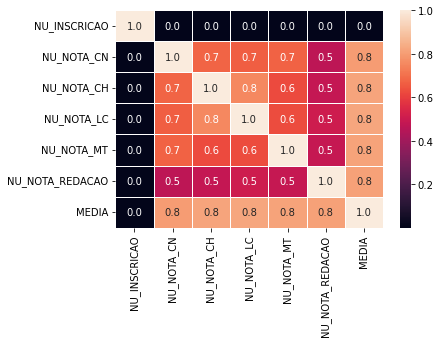

In [30]:
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot

## 3. Análise exploratória

Vamos criar alguns dataframes reduzidos e criar alguns gráficos 

In [31]:
# Analisando as variáveis 

In [32]:
colunas_TP_SEXO = microdados_enem['TP_SEXO']

In [33]:
colunas_TP_SEXO.value_counts()

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

In [34]:
microdados_enem.loc[microdados_enem['TP_COR_RACA'] == 0, 'TP_COR_RACA'] = 'ND'

In [35]:
microdados_enem.loc[microdados_enem['TP_COR_RACA'] == 1, 'TP_COR_RACA'] = 'Branca'

In [36]:
microdados_enem.loc[microdados_enem['TP_COR_RACA'] == 2, 'TP_COR_RACA'] = 'Preta'

In [37]:
microdados_enem.loc[microdados_enem['TP_COR_RACA'] == 3, 'TP_COR_RACA'] = 'Parda'

In [38]:
microdados_enem.loc[microdados_enem['TP_COR_RACA'] == 4, 'TP_COR_RACA'] = 'Amarela'

In [39]:
microdados_enem.loc[microdados_enem['TP_COR_RACA'] == 5, 'TP_COR_RACA'] = 'Indígena'

In [40]:
microdados_enem.loc[microdados_enem['TP_COR_RACA'] == 6, 'TP_COR_RACA'] = 'ND'

In [41]:
microdados_enem['TP_COR_RACA'].value_counts()

Parda       1457454
Branca      1362256
Preta        411302
ND            71154
Amarela       68491
Indígena      19175
Name: TP_COR_RACA, dtype: int64

<AxesSubplot:>

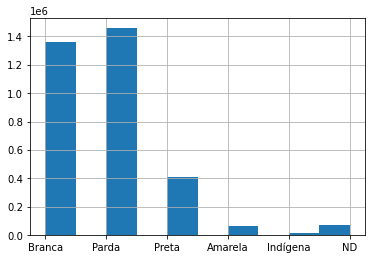

In [42]:
microdados_enem['TP_COR_RACA'].hist()

In [43]:
microdados_enem.loc[microdados_enem['TP_DEPENDENCIA_ADM_ESC'] == 1, 'TP_DEPENDENCIA_ADM_ESC'] = 'Federal'

In [44]:
microdados_enem.loc[microdados_enem['TP_DEPENDENCIA_ADM_ESC'] == 2, 'TP_DEPENDENCIA_ADM_ESC'] = 'Estadual'

In [45]:
microdados_enem.loc[microdados_enem['TP_DEPENDENCIA_ADM_ESC'] == 3, 'TP_DEPENDENCIA_ADM_ESC'] = 'Municipal'

In [46]:
microdados_enem.loc[microdados_enem['TP_DEPENDENCIA_ADM_ESC'] == 4,'TP_DEPENDENCIA_ADM_ESC'] = 'Privada'

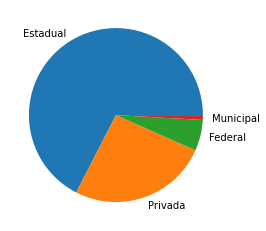

In [47]:
escolas = ['Estadual', 'Privada', 'Federal', 'Municipal'] 

plt.pie(microdados_enem['TP_DEPENDENCIA_ADM_ESC'].value_counts(), labels = escolas) 
plt.show()


In [48]:
microdados_enem['TP_DEPENDENCIA_ADM_ESC'].value_counts()

Estadual     548998
Privada      210765
Federal       46789
Municipal      7254
Name: TP_DEPENDENCIA_ADM_ESC, dtype: int64

## 4. Estudo das variáveis nota média e renda familiar

In [49]:
# Incluindo a coluna relativa à renda familiar

In [50]:
coluna_renda = microdados_enem['Q006']

In [51]:
microdados_selecionados['RENDA'] = coluna_renda

In [52]:
microdados_selecionados.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA,RENDA
0,210053865474,NaN,574.6,472.6,NaN,760.0,0.00,D
1,210052384164,505.9,551.8,498.3,461.5,560.0,515.50,B
2,210052589243,NaN,NaN,NaN,NaN,NaN,0.00,C
3,210052128335,580.7,678.9,638.9,659.5,780.0,667.60,B
4,210051353021,497.7,532.4,457.6,582.6,780.0,570.06,C


In [53]:
len(microdados_selecionados.NU_INSCRICAO)

3389832

In [54]:
# Excluindo as linhas com valores NaN

In [55]:
microdados_selecionados.dropna()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA,RENDA
1,210052384164,505.9,551.8,498.3,461.5,560.0,515.50,B
3,210052128335,580.7,678.9,638.9,659.5,780.0,667.60,B
4,210051353021,497.7,532.4,457.6,582.6,780.0,570.06,C
8,210053417016,487.4,476.5,450.7,493.4,520.0,485.60,B
9,210051128744,507.6,539.2,494.6,413.3,380.0,466.94,B
...,...,...,...,...,...,...,...,...
3389793,210054306230,506.0,405.2,416.3,450.4,240.0,403.58,D
3389807,210051254419,435.6,531.2,534.7,399.2,320.0,444.14,E
3389814,210051121001,576.9,605.6,631.0,678.0,640.0,626.30,B
3389815,210051173067,449.9,368.2,466.3,370.0,540.0,438.88,A


In [56]:
microdados_selecionados.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA,RENDA
0,210053865474,NaN,574.6,472.6,NaN,760.0,0.00,D
1,210052384164,505.9,551.8,498.3,461.5,560.0,515.50,B
2,210052589243,NaN,NaN,NaN,NaN,NaN,0.00,C
3,210052128335,580.7,678.9,638.9,659.5,780.0,667.60,B
4,210051353021,497.7,532.4,457.6,582.6,780.0,570.06,C


In [57]:
# Agrupando os daados de renda familiar

In [58]:
microdados_selecionados['RENDA'].value_counts()

B    932838
C    575943
D    432478
F    233353
E    209943
A    202114
G    195709
H    151384
I     93898
J     57492
M     57363
Q     48686
K     45090
L     39388
O     39169
P     39117
N     35865
Name: RENDA, dtype: int64

In [59]:
# Para melhorar a visualização, vamos trocar as letras de respostas sobre a renda familiar pela sua descrição

In [60]:
dic_renda = {
'A':'Nenhuma Renda',
'B':'Até R$ 1.100,00',
'C':'De R$ 1.100,01 até R$ 1.650,00',
'D':'De R$ 1.650,01 até R$ 2.200,00',
'E':'De R$ 2.200,01 até R$ 2.750,00',
'F':'De R$ 2.750,01 até R$ 3.300,00',
'G':'De R$ 3.300,01 até R$ 4.400,00',
'H':'De R$ 4.400,01 até R$ 5.500,00',
'I':'De R$ 5.500,01 até R$ 6.600,00',
'J':'De R$ 6.600,01 até R$ 7.700,00',
'K':'De R$ 7.700,01 até R$ 8.800,00',
'L':'De R$ 8.800,01 até R$ 9.900,00',
'M':'De R$ 9.900,01 até R$ 11.000,00',
'N':'De R$ 11.000,01 até R$ 13.200,00',
'O':'De R$ 13.200,01 até R$ 16.500,00',
'P':'De R$ 16.500,01 até R$ 22.000,00',
'Q':'Acima de R$ 22.000,00'
}

In [61]:
microdados_renda = microdados_selecionados

In [62]:
microdados_renda.filter(items=['NU_INSCRICAO', 'RENDA']).groupby('RENDA').count()

,NU_INSCRICAO
RENDA,
A,202114
B,932838
C,575943
D,432478
E,209943
F,233353
G,195709
H,151384
I,93898


In [63]:
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'A', 'RENDA'] = dic_renda['A']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'B', 'RENDA'] = dic_renda['B']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'C', 'RENDA'] = dic_renda['C']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'D', 'RENDA'] = dic_renda['D']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'E', 'RENDA'] = dic_renda['E']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'F', 'RENDA'] = dic_renda['F']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'G', 'RENDA'] = dic_renda['G']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'H', 'RENDA'] = dic_renda['H']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'I', 'RENDA'] = dic_renda['I']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'J', 'RENDA'] = dic_renda['J']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'K', 'RENDA'] = dic_renda['K']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'L', 'RENDA'] = dic_renda['L']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'M', 'RENDA'] = dic_renda['M']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'N', 'RENDA'] = dic_renda['N']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'O', 'RENDA'] = dic_renda['O']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'P', 'RENDA'] = dic_renda['P']
microdados_selecionados.loc[microdados_selecionados['RENDA'] == 'Q', 'RENDA'] = dic_renda['Q']

In [64]:
# Observando as quantidades de candidatos por cada faixa de renda

In [65]:
microdados_selecionados.filter(items=['NU_INSCRICAO', 'RENDA']).groupby('RENDA').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
RENDA,
"Até R$ 1.100,00",932838
"De R$ 1.100,01 até R$ 1.650,00",575943
"De R$ 1.650,01 até R$ 2.200,00",432478
"De R$ 2.750,01 até R$ 3.300,00",233353
"De R$ 2.200,01 até R$ 2.750,00",209943
Nenhuma Renda,202114
"De R$ 3.300,01 até R$ 4.400,00",195709
"De R$ 4.400,01 até R$ 5.500,00",151384
"De R$ 5.500,01 até R$ 6.600,00",93898


In [66]:
microdados_selecionados.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA,RENDA
0,210053865474,NaN,574.6,472.6,NaN,760.0,0.00,"De R$ 1.650,01 até R$ 2.200,00"
1,210052384164,505.9,551.8,498.3,461.5,560.0,515.50,"Até R$ 1.100,00"
2,210052589243,NaN,NaN,NaN,NaN,NaN,0.00,"De R$ 1.100,01 até R$ 1.650,00"
3,210052128335,580.7,678.9,638.9,659.5,780.0,667.60,"Até R$ 1.100,00"
4,210051353021,497.7,532.4,457.6,582.6,780.0,570.06,"De R$ 1.100,01 até R$ 1.650,00"


In [67]:
# retirando os valores nulos da média

In [68]:
filtro = microdados_selecionados['MEDIA'] > 0
microdados_limpos = microdados_selecionados[filtro]

In [69]:
microdados_selecionados.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA,RENDA
0,210053865474,NaN,574.6,472.6,NaN,760.0,0.00,"De R$ 1.650,01 até R$ 2.200,00"
1,210052384164,505.9,551.8,498.3,461.5,560.0,515.50,"Até R$ 1.100,00"
2,210052589243,NaN,NaN,NaN,NaN,NaN,0.00,"De R$ 1.100,01 até R$ 1.650,00"
3,210052128335,580.7,678.9,638.9,659.5,780.0,667.60,"Até R$ 1.100,00"
4,210051353021,497.7,532.4,457.6,582.6,780.0,570.06,"De R$ 1.100,01 até R$ 1.650,00"


In [70]:
len(microdados_selecionados)

3389832

In [71]:
# Diminuindo a quantidade de colunas num novo data frame

In [72]:
microdados_renda = microdados_selecionados.filter(items = ['NU_INSCRICAO', 'MEDIA','RENDA'])

In [73]:
microdados_renda.head()

,NU_INSCRICAO,MEDIA,RENDA
0,210053865474,0.00,"De R$ 1.650,01 até R$ 2.200,00"
1,210052384164,515.50,"Até R$ 1.100,00"
2,210052589243,0.00,"De R$ 1.100,01 até R$ 1.650,00"
3,210052128335,667.60,"Até R$ 1.100,00"
4,210051353021,570.06,"De R$ 1.100,01 até R$ 1.650,00"


In [74]:
microdados_renda.filter(items=['NU_INSCRICAO', 'RENDA']).groupby('RENDA').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
RENDA,
"Até R$ 1.100,00",932838
"De R$ 1.100,01 até R$ 1.650,00",575943
"De R$ 1.650,01 até R$ 2.200,00",432478
"De R$ 2.750,01 até R$ 3.300,00",233353
"De R$ 2.200,01 até R$ 2.750,00",209943
Nenhuma Renda,202114
"De R$ 3.300,01 até R$ 4.400,00",195709
"De R$ 4.400,01 até R$ 5.500,00",151384
"De R$ 5.500,01 até R$ 6.600,00",93898


In [75]:
# Observando o desemprenho por faixa de renda

In [76]:
microdados_renda.filter(items=['MEDIA', 'RENDA']).groupby('RENDA').mean().sort_values(by='MEDIA', ascending=False)

,MEDIA
RENDA,
"De R$ 16.500,01 até R$ 22.000,00",524.259044
"De R$ 13.200,01 até R$ 16.500,00",519.858404
"Acima de R$ 22.000,00",518.408180
"De R$ 11.000,01 até R$ 13.200,00",514.146679
"De R$ 9.900,01 até R$ 11.000,00",505.740260
"De R$ 8.800,01 até R$ 9.900,00",496.540291
"De R$ 7.700,01 até R$ 8.800,00",491.823224
"De R$ 6.600,01 até R$ 7.700,00",483.571201
"De R$ 5.500,01 até R$ 6.600,00",469.816304


In [77]:
microdados_renda.filter(items=['MEDIA', 'RENDA']).groupby('RENDA').median().sort_values(by='MEDIA', ascending=False)

,MEDIA
RENDA,
"Acima de R$ 22.000,00",614.08
"De R$ 16.500,01 até R$ 22.000,00",609.36
"De R$ 13.200,01 até R$ 16.500,00",602.00
"De R$ 11.000,01 até R$ 13.200,00",595.78
"De R$ 9.900,01 até R$ 11.000,00",586.48
"De R$ 8.800,01 até R$ 9.900,00",579.06
"De R$ 7.700,01 até R$ 8.800,00",573.78
"De R$ 6.600,01 até R$ 7.700,00",567.06
"De R$ 5.500,01 até R$ 6.600,00",556.26


In [78]:
# Usando matplotlib para visualizar o gráfico Média x Renda FAmiliar

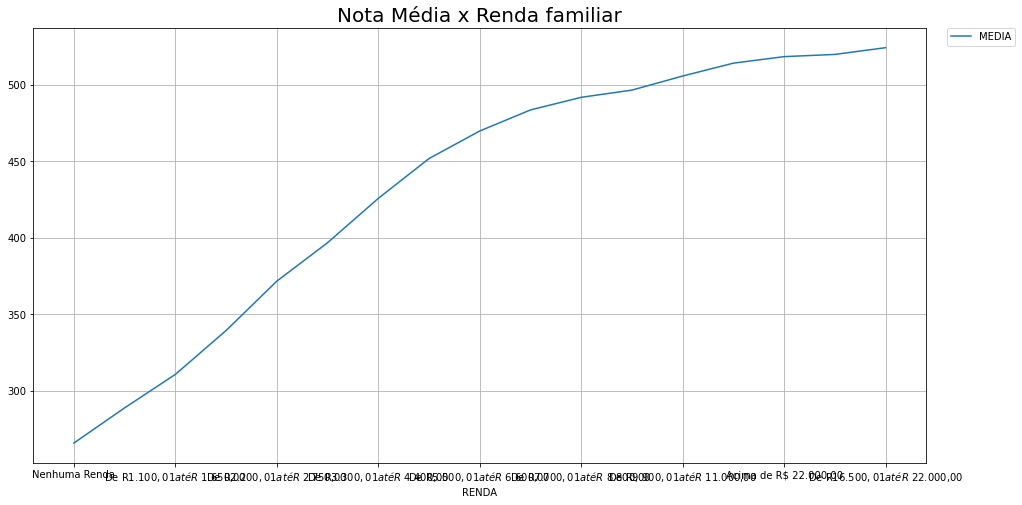

In [79]:
ax = microdados_renda.filter(items=['MEDIA', 'RENDA']).groupby('RENDA').mean().sort_values(by='MEDIA', ascending=True)\
.plot(figsize=(16,8), grid=True)
ax.set_title('Nota Média x Renda familiar', fontsize = 20)
ax.legend(bbox_to_anchor=(1.1, 1), loc=0, borderaxespad=0.)